In [1]:
import pandas as pd
import numpy as np
import matplotlib
## Agg, PS, PDF, SVG, wx, Tk
matplotlib.use("Agg")
# remove annoying windows
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import date

In [2]:
data1 = pd.read_csv('./data.csv')
print(len(data1))
data1.head()

1061


,intensity,name,signal,start_date,start_time,end_date,end_time,duration
0,颱風,無名,1,1946/07/16,16:10 夏,1946/07/17,12:15 夏,20 05
1,颱風,無名,8 東北,1946/07/17,12:15 夏,1946/07/18,11:30 夏,23 15
2,颱風,無名,9,1946/07/18,11:30 夏,1946/07/18,15:15 夏,03 45
3,颱風,無名,10,1946/07/18,15:15 夏,1946/07/18,20:00 夏,04 45
4,颱風,無名,8 東南,1946/07/18,20:00 夏,1946/07/18,22:00 夏,02 00


In [3]:
## format conversion 
data2 = data1.copy()

for col in ['start_date', 'end_date']:
    data2[col] = pd.to_datetime(data2[col])
    
for col in ['signal', 'start_time', 'end_time']:
    data2[col] = data2[col].str.replace('[^\d]', '')
    data2[col] = data2[col].apply(int)

def durationToMinute(s):
    a,b = s.split(' ')
    return int(a)*60 + int(b)
data2['duration'] = data2['duration'].apply(durationToMinute)
    
data2.head()

,intensity,name,signal,start_date,start_time,end_date,end_time,duration
0,颱風,無名,1,1946-07-16,1610,1946-07-17,1215,1205
1,颱風,無名,8,1946-07-17,1215,1946-07-18,1130,1395
2,颱風,無名,9,1946-07-18,1130,1946-07-18,1515,225
3,颱風,無名,10,1946-07-18,1515,1946-07-18,2000,285
4,颱風,無名,8,1946-07-18,2000,1946-07-18,2200,120


In [4]:
d = data2
s8 = d[d['signal'] >= 8]

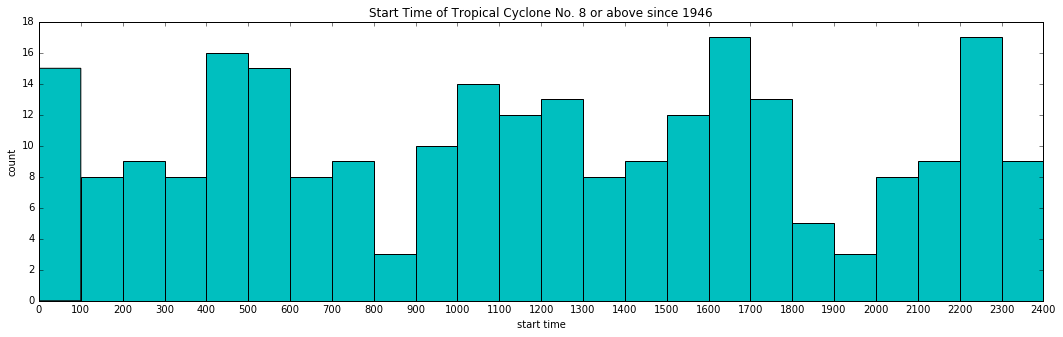

In [5]:
data = s8['start_time']
plt.figure(figsize=(18,5))
plt.title('Start Time of Tropical Cyclone No. 8 or above since 1946')
plt.xlabel('start time')
plt.ylabel('count')
plt.xticks(np.linspace(0,2400,25))
plt.hist(data, bins=24, range=(0,2400), color='c')
plt.show()

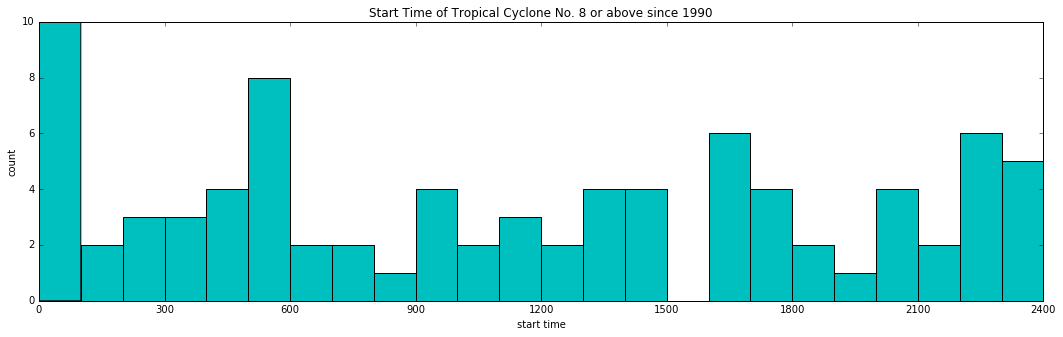

In [6]:
data = s8['start_time'][s8['start_date'] > date(1990,1,1)]
plt.figure(figsize=(18,5))
plt.title('Start Time of Tropical Cyclone No. 8 or above since 1990')
plt.xlabel('start time')
plt.ylabel('count')
plt.xticks(np.linspace(0,2400,9))
plt.hist(data, bins=24, range=(0,2400), color='c')
plt.show()

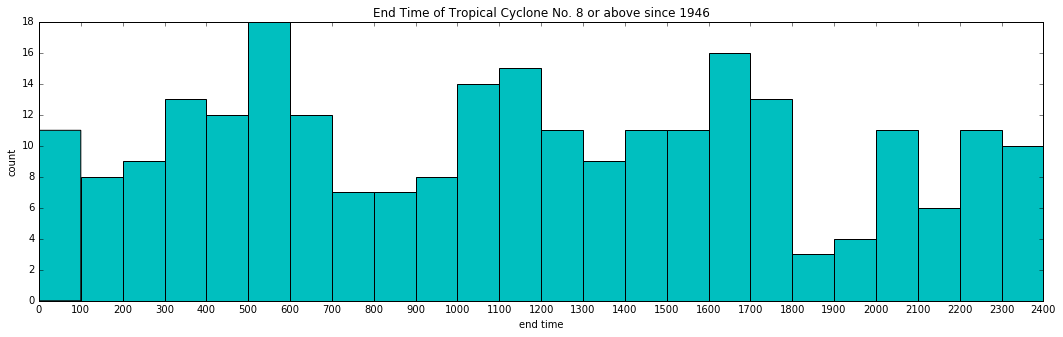

In [7]:
data = s8['end_time']
plt.figure(figsize=(18,5))
plt.title('End Time of Tropical Cyclone No. 8 or above since 1946')
plt.xlabel('end time')
plt.ylabel('count')
plt.xticks(np.linspace(0,2400,25))
plt.hist(data, bins=24, range=(0,2400), color='c')
plt.show()

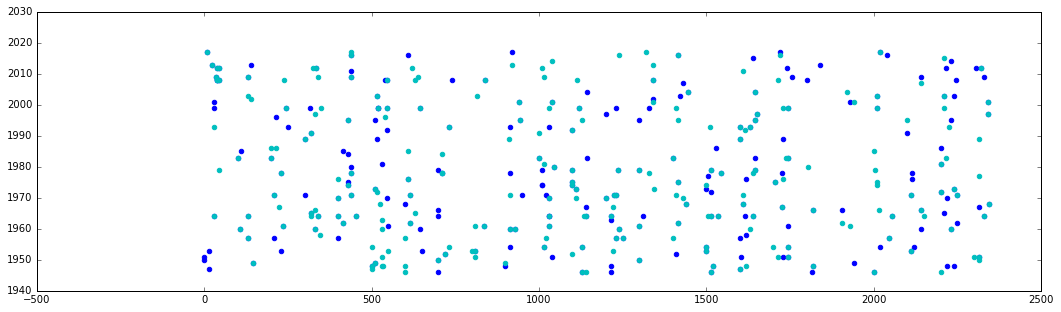

In [8]:
plt.figure(figsize=(18,5))
plt.scatter(s8['start_time'], s8['start_date'].map(lambda x: x.year), color='b')
plt.scatter(s8['end_time'], s8['start_date'].map(lambda x: x.year), color='c')